In [1]:
# 가로로 넓게 쓰기
from IPython.core.display import display, HTML  
display(HTML("<style>.container { width:100% !important; }</style>"))

print("Setup Complete")

Setup Complete


In [17]:
import time 
import datetime
from datetime import datetime

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import pandas_profiling 
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler

# importing plotly and cufflinks in offline mode
# import cufflinks as cf
# import plotly.offline as pyo
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

# pyo.init_notebook_mode()

import warnings
warnings.filterwarnings('ignore')

In [18]:
path = "/home/kym/ML/input/kamp/대회 과제"
os.chdir(path)

df = pd.read_csv('melting_tank.csv', encoding='cp949')

In [4]:
print(df.shape)

(835200, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB


In [6]:
# df.profile_report()
# profile = df.profile_report(title='Competition_Pandas Profiling Report')
# profile.to_file(output_file="Competition data profiling.html")

In [7]:
df['MELT_TEMP'] = (df['MELT_TEMP'] / 10) # 용해온도, 교반속도 데이터는 소수점 1 자리 생략 
df['MOTORSPEED'] = (df['MOTORSPEED'] / 10)

result_mapping = {
    "OK": 1,
    "NG": 0
}

df.loc[:, "TAG"] = df.TAG.map(result_mapping)

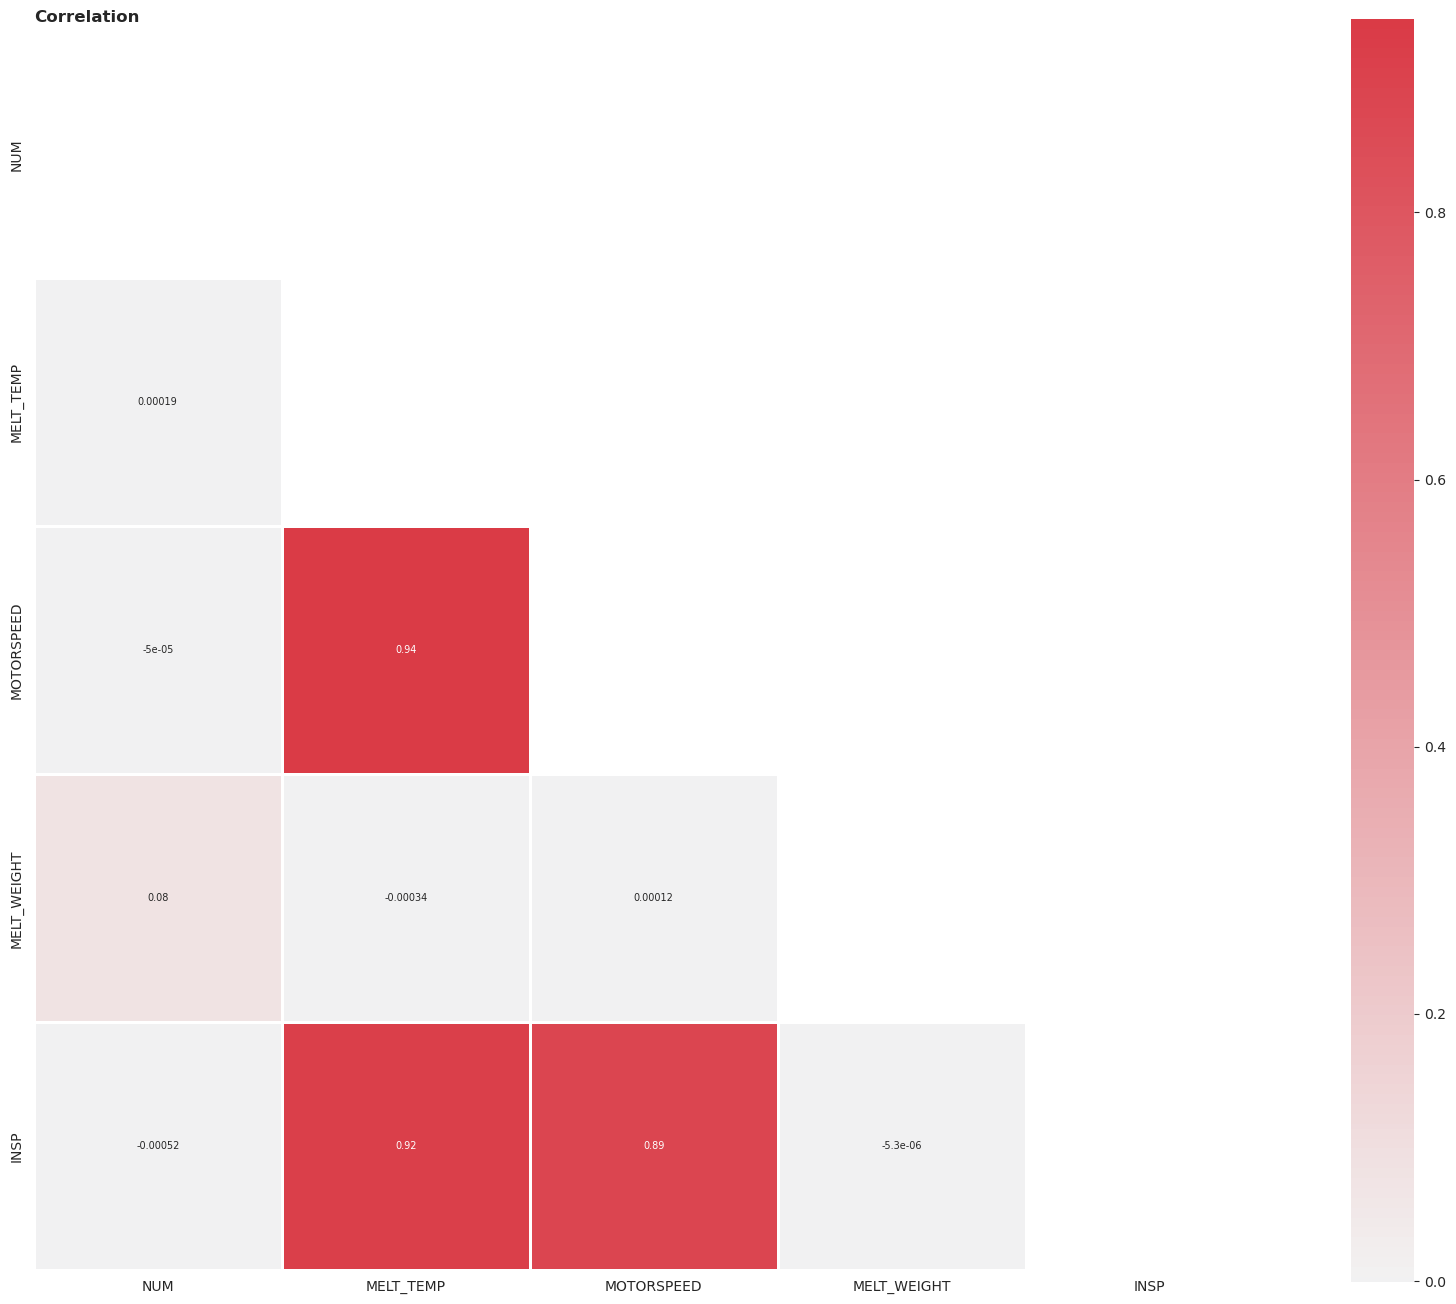

In [19]:
# Heatmap

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
df_corr = df.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_corr, ax=ax,
           square=True, center=0, linewidth=1,
           cmap=sns.diverging_palette(240, 10, as_cmap=True),
           cbar_kws={'shrink': .82},
           mask=mask,
           annot=True,
           annot_kws={'size':7}
           )
ax.set_title(f'Correlation', loc='left', fontweight='bold')
plt.show()

In [9]:
# # 수분 함유량 (INSP) 가 3.21 ~ 3.23 은 불량이 극히 적다. (높을수록 정상이 많음.)
# df[['INSP', 'TAG']].groupby(['INSP'], as_index=True).mean().iplot(kind='bar')

In [21]:
df['STD_DT'] = df['STD_DT'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S'))
df.set_index('STD_DT', inplace=True)

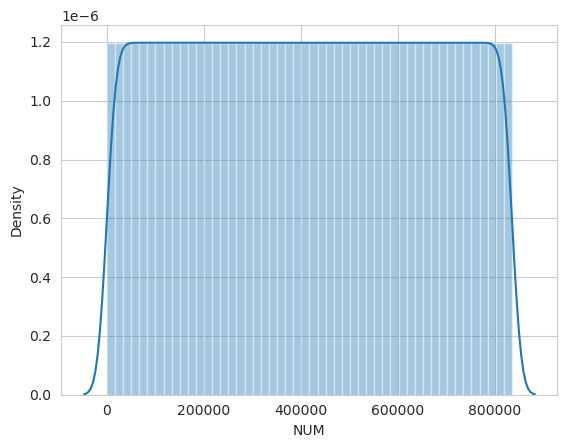

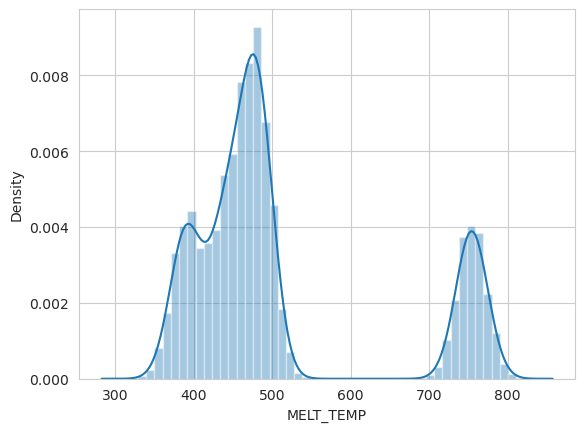

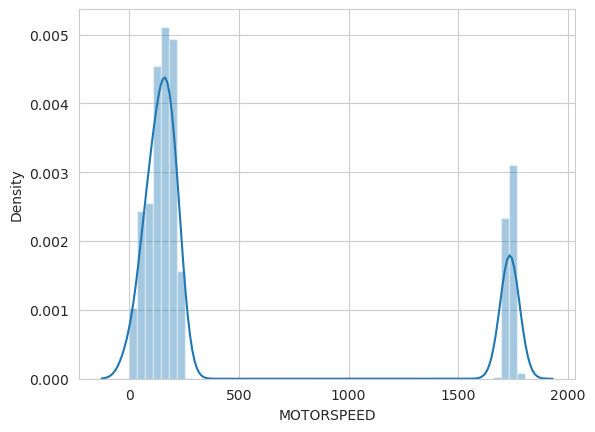

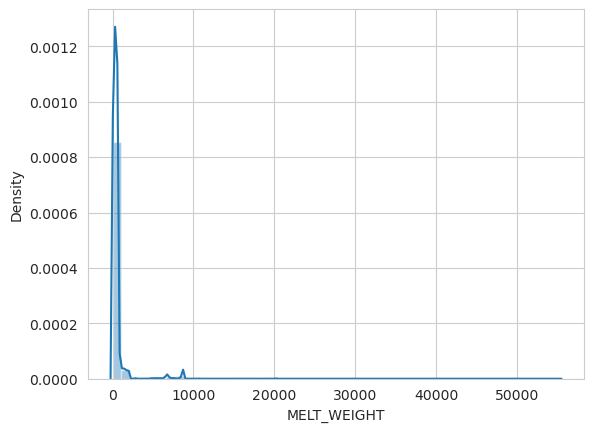

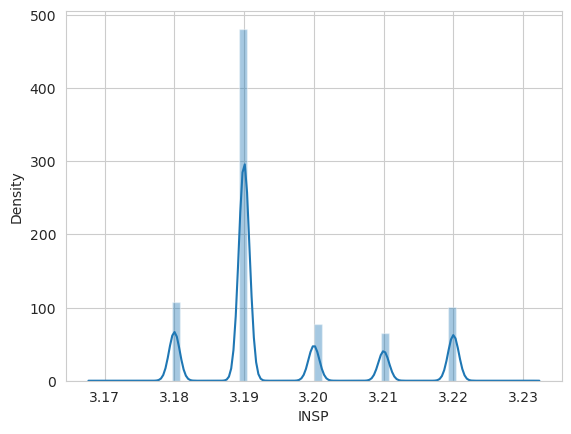

ValueError: could not convert string to float: 'OK'

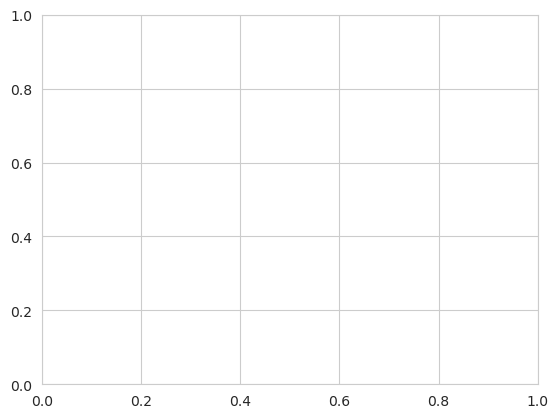

In [22]:
for i in df.columns:
    print("=============================================")
    sns.distplot(df[i])
    plt.show()
    print()

In [12]:
corr = df.corr(method='pearson')
corr

,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
NUM,1.000000,0.000188,-0.000050,0.080079,-0.000524,0.086698
MELT_TEMP,0.000188,1.000000,0.944929,-0.000336,0.916295,0.310586
MOTORSPEED,-0.000050,0.944929,1.000000,0.000123,0.887813,0.264693
MELT_WEIGHT,0.080079,-0.000336,0.000123,1.000000,-0.000005,-0.012084
INSP,-0.000524,0.916295,0.887813,-0.000005,1.000000,0.272580
TAG,0.086698,0.310586,0.264693,-0.012084,0.272580,1.000000


아래는 용량 문제로 주석 처리

In [13]:
# import plotly.express as px

# fig = px.scatter(df, x='MOTORSPEED', y='INSP', marginal_y='histogram', marginal_x='histogram')
# fig.show()

In [14]:
# fig = px.scatter(df, x='MELT_WEIGHT', y='INSP', marginal_y='histogram', marginal_x='histogram')
# fig.show()

In [15]:
# fig = px.scatter(df, x='MELT_TEMP', y='INSP', marginal_y='histogram', marginal_x='histogram')
# fig.show()

In [16]:
# fig = px.scatter(df, x='INSP', y='TAG', marginal_y='histogram', marginal_x='histogram')
# fig.show()